In [37]:
# Save the trained model
model_1.save('/home/devnath/Ember_18_Aug/model_save/ann_base_classfier.h5')

Epoch 1/50
9422/9422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8221 - loss: 0.3760
Epoch 1: val_loss improved from inf to 0.23643, saving model to /home/devnath/Ember_18_Aug/ember/ember_standard_csv_v3/ann_40_final_binary_base_classfier.keras
9422/9422 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.8221 - loss: 0.3760 - val_accuracy: 0.9013 - val_loss: 0.2364
Epoch 2/50
9398/9422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8999 - loss: 0.2395
Epoch 2: val_loss improved from 0.23643 to 0.21116, saving model to /home/devnath/Ember_18_Aug/ember/ember_standard_csv_v3/ann_40_final_binary_base_classfier.keras
9422/9422 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8999 - loss: 0.2395 - val_accuracy: 0.9114 - val_loss: 0.2112
Epoch 3/50
9396/9422 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9104 - loss: 0.2160
Epoch 3: val_loss improved from 0.21116 to 0.20115, saving model to /home/devnath/Ember_18_Aug/ember/ember_standard_csv_v3/ann_40_final_binary_base_classfier.keras
9422/942

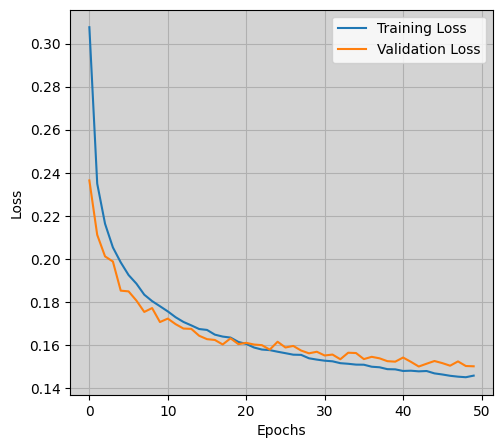

In [12]:
import json
import csv
import threading
import math
import pandas as pd
import numpy as np
import multiprocessing
import random as rn

import seaborn as sns
import matplotlib.pyplot as plt



# from data import data_visualization, data_loading, data_preprocessing
# from models import annModels

# from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.model_selection import  learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from scikeras.wrappers import KerasClassifier

# import xgboost as xgb

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout, Activation
from keras.optimizers import SGD
from keras.models import load_model
from keras import regularizers
from keras import backend as K
from keras.layers import BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.layers import concatenate
from sklearn.model_selection import StratifiedKFold

import joblib


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Load and preprocess data
def load_data():
    df = pd.read_csv('/home/devnath/Ember_18_Aug/ember/ember_standard_csv_v3/final_dataset.csv')
    X = df.drop(['label', 'Unnamed: 0'], axis=True).values
    y = df['label'].values
    
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_train,
        y_train,
        test_size=0.1,
        random_state=42,
        stratify=y_train
    )

    return X_train, X_test, y_train, y_test, X_val, y_val

X_train, X_test, y_train, y_test, X_val, y_val = load_data()

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Build and compile the ANN model
def build_ann(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))  # Adjust dropout rate
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))  # Adjust dropout rate
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax'))  # 2 units for binary classification
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])  # Adjust learning rate
    return model

input_dim = X_train.shape[1]
model_1 = build_ann(input_dim)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # Adjust patience
model_checkpoint = ModelCheckpoint(
    filepath='/home/devnath/Ember_18_Aug/ember/ember_standard_csv_v3/ann_40_final_binary_base_classfier.keras', 
    monitor='val_loss', 
    save_best_only=True,
    save_weights_only=False, 
    mode='min', 
    verbose=1
)

# Train the model
history_1 = model_1.fit(X_train, y_train,
                        epochs=50,
                        batch_size=32,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping, model_checkpoint])

# Evaluate the model
test_loss, test_accuracy = model_1.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')






# Plot training & validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.title('Loss')

# Set grid and background color
plt.grid(True)  # Add grid
plt.gca().set_facecolor('lightgrey')  # Set background color of the plot area



2618/2618 ━━━━━━━━━━━━━━━━━━━━ 3s 836us/step


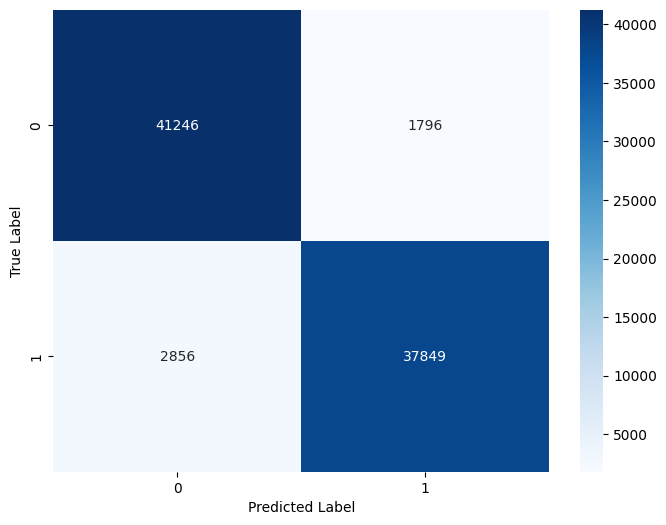

In [13]:
# Make predictions on the test set
y_pred_prob = model_1.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Convert y_test back to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)


# Optional: Visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# plt.title('Confusion Matrix')
plt.show()


In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
# Calculate metrics
accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred)
recall = recall_score(y_test_labels, y_pred)
f1 = f1_score(y_test_labels, y_pred)


In [15]:
# Print results
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Confusion Matrix:
[[41246  1796]
 [ 2856 37849]]
Accuracy: 0.9445
Precision: 0.9547
Recall: 0.9298
F1 Score: 0.9421


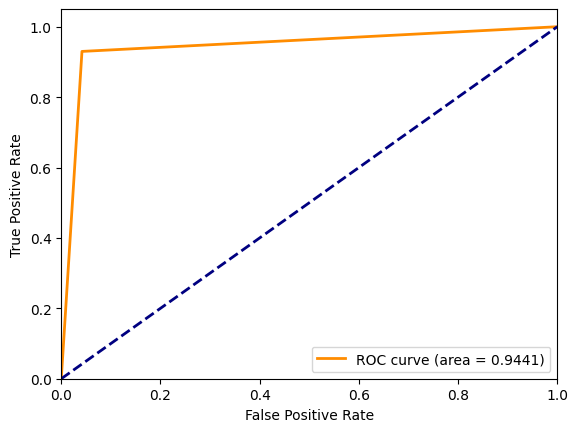

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, accuracy_score


# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_labels, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [17]:
# Save the trained model
model_1.save('/home/devnath/Ember_18_Aug/model_save/ann_base_classfier.h5')

In [18]:
!nvidia-smi

Sat Aug 24 16:26:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A4000               Off | 00000000:47:00.0 Off |                  Off |
| 41%   36C    P8              15W / 140W |  14594MiB / 16376MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!kill 7470 

In [2]:
import pandas as pd
df = pd.read_csv('/home/devnath/Ember_18_Aug/ember/ember_standard_csv_v3/final_dataset.csv')
X = df.drop(['label', 'Unnamed: 0'], axis=True).values
y = df['label'].values

In [3]:
X.shape

(418732, 41)

In [4]:
y.shape

(418732,)

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout, Activation
from keras.optimizers import SGD
from keras.models import load_model
from keras import regularizers
from keras import backend as K
from keras.layers import BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.layers import concatenate
from sklearn.model_selection import StratifiedKFold

import joblib


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint





# Load and preprocess data
def load_data():
    df = pd.read_csv('/home/devnath/Ember_18_Aug/ember/ember_standard_csv_v3/final_dataset.csv')
    X = df.drop(['label', 'Unnamed: 0'], axis=True).values
    y = df['label'].values
    
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_train,
        y_train,
        test_size=0.1,
        random_state=42,
        stratify=y_train
    )

    return X_train, X_test, y_train, y_test, X_val, y_val

X_train, X_test, y_train, y_test, X_val, y_val = load_data()

2024-08-25 15:01:03.075422: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-25 15:01:03.087502: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-25 15:01:03.101867: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-25 15:01:03.106357: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-25 15:01:03.116704: I tensorflow/core/platform/cpu_feature_guar

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((301486, 41), (83747, 41), (301486,), (83747,), (33499, 41), (33499,))

In [8]:
# Load the model from the .h5 file
model = load_model('/home/devnath/Ember_18_Aug/model_save/ann_base_classfier.h5')

2024-08-25 15:03:49.406378: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1118 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:47:00.0, compute capability: 8.6


In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 64)             │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,908 (140.27 KB)

 Trainable params: 35,906 (140.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)